In [22]:
import pandas as pd
import numpy as np 
import os
import plotly.express as px
from matplotlib import pyplot
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt
from matplotlib import pyplot
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_percentage_error

# For investigating timeseries data
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import adfuller
from sklearn import preprocessing

# Modeling
from tqdm import tqdm_notebook
from itertools import product
import statsmodels.api as sm
from statsmodels.stats.diagnostic import acorr_ljungbox

# Importing prophet
from prophet import Prophet

### Loading Data

In [23]:
# Reading Data
base_path =  os.getcwd()
file_name = 'Traffic_Data.xlsx'
total_path = base_path + '//Data//' 
df = pd.read_excel(total_path + file_name, sheet_name='Sheet1')

# Filtering for just one state
df = df[df['State'] == 'Washington']
df.head(10)

,State,Region,STATIONS,CMILES,PMILES,Month,Month_2,Year,Date
49,Washington,West,164,4527,4288,November,11,2023,2023-11-01
100,Washington,West,170,4438,4079,December,12,2023,2023-12-01
151,Washington,West,166,5015,4953,October,10,2023,2023-10-01
202,Washington,West,166,5216,5189,September,9,2023,2023-09-01
253,Washington,West,162,5885,5839,August,8,2023,2023-08-01
304,Washington,West,164,5945,5801,July,7,2023,2023-07-01
355,Washington,West,168,5537,5302,June,6,2023,2023-06-01
406,Washington,West,173,5387,5109,May,5,2023,2023-05-01
457,Washington,West,181,4698,4686,April,4,2023,2023-04-01
508,Washington,West,181,4750,4770,March,3,2023,2023-03-01


### Splitting Into Test/Train

In [24]:
test_train_split = 0.9
pre_split = df[['CMILES', 'Date']].copy()
pre_split = pre_split.rename(columns= {'CMILES':'y',
                                       'Date':'ds'})
train = pre_split[:int(test_train_split * len(pre_split['y']))]
test = pre_split[int(test_train_split * len(pre_split['y'])):]
train.head(10)


,y,ds
49,4527,2023-11-01
100,4438,2023-12-01
151,5015,2023-10-01
202,5216,2023-09-01
253,5885,2023-08-01
304,5945,2023-07-01
355,5537,2023-06-01
406,5387,2023-05-01
457,4698,2023-04-01
508,4750,2023-03-01


### Fitting Prophet Model

In [25]:
model = Prophet()
model.fit(train)

20:19:19 - cmdstanpy - INFO - Chain [1] start processing
20:19:19 - cmdstanpy - INFO - Chain [1] done processing


### Forecasting

In [26]:
future = model.make_future_dataframe(periods=12)
future.tail()

,ds
61,2023-12-09
62,2023-12-10
63,2023-12-11
64,2023-12-12
65,2023-12-13


c:\Users\seelc\OneDrive\Desktop\Lucas Desktop Items\Projects\Timeseries-Forecasting\.venv\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
c:\Users\seelc\OneDrive\Desktop\Lucas Desktop Items\Projects\Timeseries-Forecasting\.venv\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


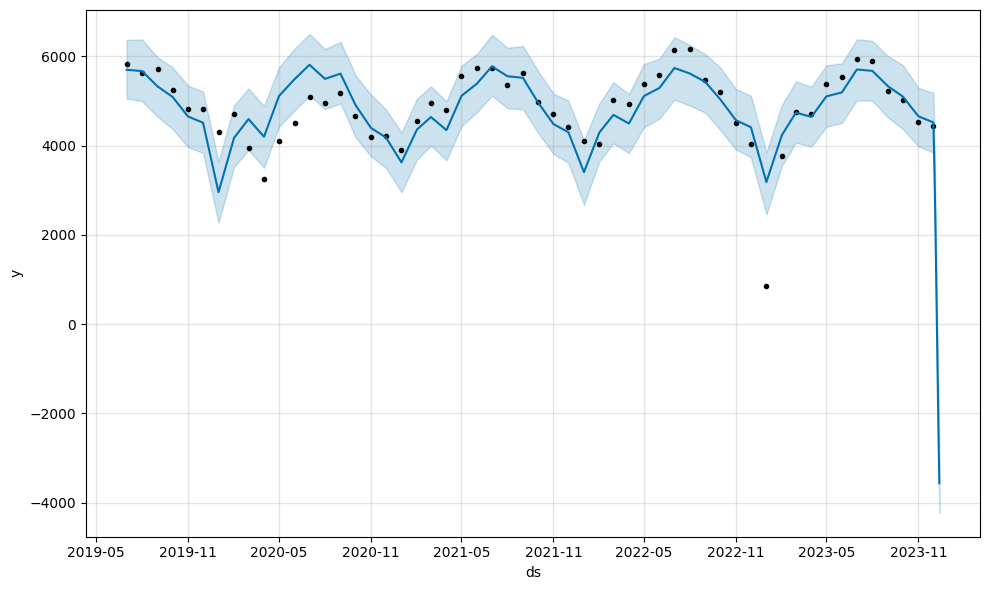

In [28]:
forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()
fig1 = model.plot(forecast)

c:\Users\seelc\OneDrive\Desktop\Lucas Desktop Items\Projects\Timeseries-Forecasting\.venv\Lib\site-packages\prophet\plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
c:\Users\seelc\OneDrive\Desktop\Lucas Desktop Items\Projects\Timeseries-Forecasting\.venv\Lib\site-packages\prophet\plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
c:\Users\seelc\OneDrive\Desktop\Lucas Desktop Items\Projects\Timeseries-Forecasting\.venv\Lib\site-packages\prophet\plot.py:354: FutureWarning: The behav

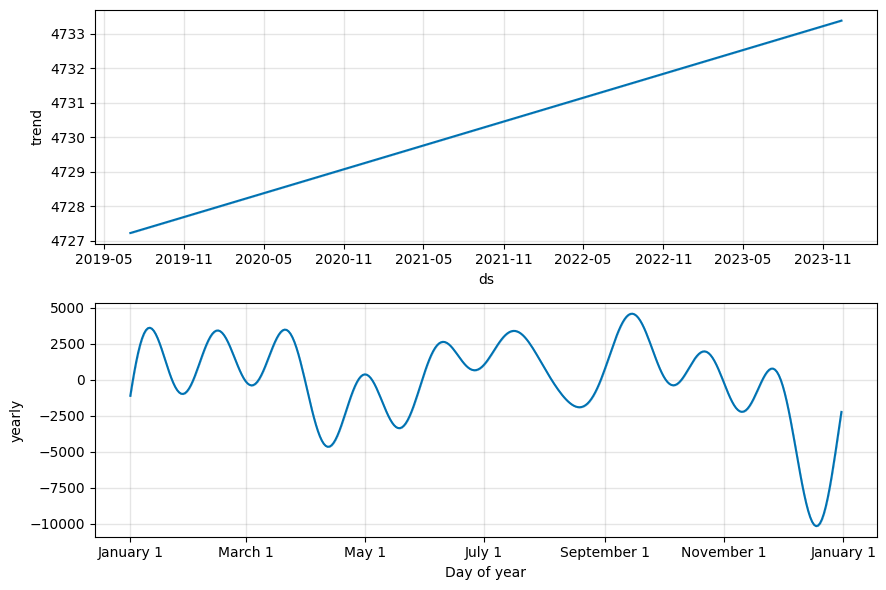

In [30]:
fig2 = model.plot_components(forecast)